In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [120]:
df=pd.read_csv('SUV.csv')

In [121]:
df

,UserID,Gender,Age,Estimated Salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,18000,0
5,15728773,Male,27,30000,0
6,15598044,Female,27,67000,0
7,15694829,Female,32,84000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,150000,0


In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
model=LinearRegression()

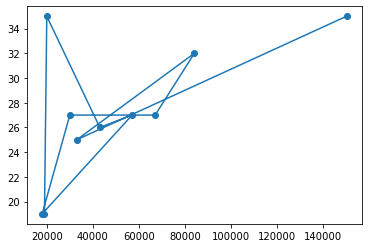

In [124]:
plt.scatter(df['Estimated Salary'],df.Age)
plt.plot(df['Estimated Salary'],df.Age)

<AxesSubplot:xlabel='Gender', ylabel='count'>

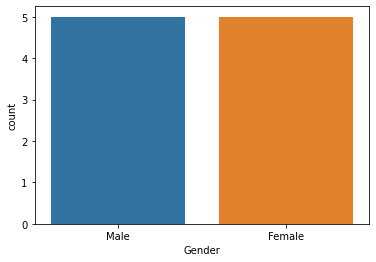

In [125]:
sns.countplot(x="Gender",data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

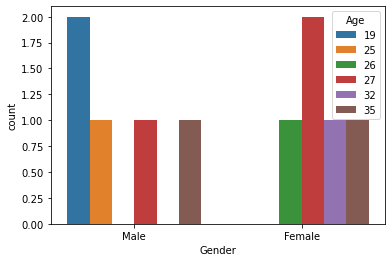

In [126]:
sns.countplot(x="Gender",hue="Age",data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

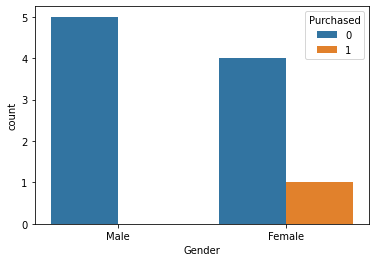

In [127]:
sns.countplot(x="Gender",hue="Purchased",data=df)

In [128]:
sex=pd.get_dummies(df["Gender"],drop_first=True)
sex

,Male
0,1
1,1
2,0
3,0
4,1
5,1
6,0
7,0
8,1
9,0


In [129]:
purchase=pd.get_dummies(df["Purchased"],drop_first=True)
purchase

,1
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [130]:
df=pd.concat([df,sex,purchase],axis=1)
df

,UserID,Gender,Age,Estimated Salary,Purchased,Male,1
0,15624510,Male,19,19000,0,1,0
1,15810944,Male,35,20000,0,1,0
2,15668575,Female,26,43000,0,0,0
3,15603246,Female,27,57000,0,0,0
4,15804002,Male,19,18000,0,1,0
5,15728773,Male,27,30000,0,1,0
6,15598044,Female,27,67000,0,0,0
7,15694829,Female,32,84000,1,0,1
8,15600575,Male,25,33000,0,1,0
9,15727311,Female,35,150000,0,0,0


In [131]:
df.drop(['Gender','Purchased','UserID'],inplace=True,axis=1)


In [132]:
df

,Age,Estimated Salary,Male,1
0,19,19000,1,0
1,35,20000,1,0
2,26,43000,0,0
3,27,57000,0,0
4,19,18000,1,0
5,27,30000,1,0
6,27,67000,0,0
7,32,84000,0,1
8,25,33000,1,0
9,35,150000,0,0


In [134]:
df.drop(['1'],axis=1)

KeyError: "['1'] not found in axis"

In [136]:
x=df['Age']


In [137]:
y=df['Estimated Salary']

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
logmodel=LogisticRegression()

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [142]:
x_train

4    19
0    19
3    27
1    35
7    32
8    25
5    27
Name: Age, dtype: int64

In [143]:
y_train

4    18000
0    19000
3    57000
1    20000
7    84000
8    33000
5    30000
Name: Estimated Salary, dtype: int64

In [144]:
logmodel.fit(x_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[19. 19. 27. 35. 32. 25. 27.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [145]:
prediction=logmodel.predict(x_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [146]:
prediction

array([57000, 20000, 57000], dtype=int64)

In [147]:
logmodel.score(x_test,y_test)*100

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)


array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]], dtype=int64)

In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.0

In [150]:
y_test


2     43000
9    150000
6     67000
Name: Estimated Salary, dtype: int64